In [1]:
import sys
sys.path.append("../../")

In [2]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis
import logging

In [3]:
eis_data = eis_dataframe_from_csv("../../data/train_data.csv")

In [4]:
# Plot all circuits in a big plot to get an understanding of the data 
# We got 9 different circuits: len(eis_data.Circuit.unique())
# Layout: 3 rows, 3 columns subplot

# fig, ax = plot_multiple_eis(eis_data, method='all', title='Nyquist Plot')
# plt.savefig('all.png', dpi=300)
# plt.show()

In [5]:
# fig, ax = plot_multiple_eis(eis_data, method='random')
# plt.savefig('random1.png', dpi=300)
# plt.show()

In [6]:
# fig, ax = plot_multiple_eis(eis_data, method='random', title='Nyquist Plot')
# plt.savefig('random2.pdf.png', dpi=300)
# plt.show()


In [7]:
# fig, ax = plot_multiple_eis(eis_data, method='first', title='Nyquist Plot')
# plt.savefig('first.png', dpi=300)
# plt.show()

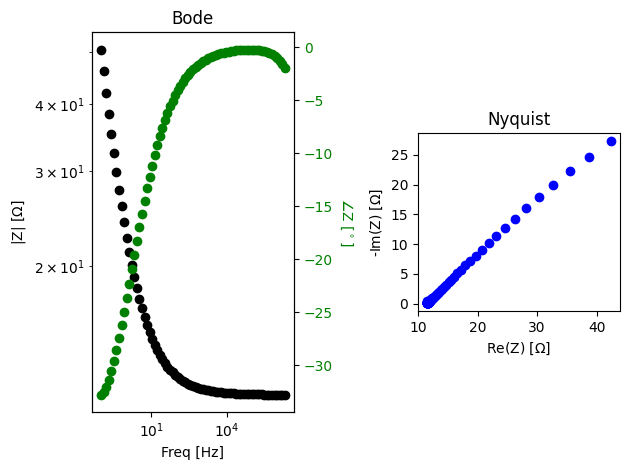

In [8]:
# plot data w/o circuit model
sample = eis_data.loc[eis_data.Circuit == "RC-G-G"].iloc[0]
frequencies = sample.freq
impedances = sample.Z
plot_eis(frequencies, impedances)

R1: 1.15e+01, C1: 1.51e-09, R_g1: 6.89e-02, t_g1: 1.12e+01, R_g2: 1.18e+02, t_g2: 8.13e+01


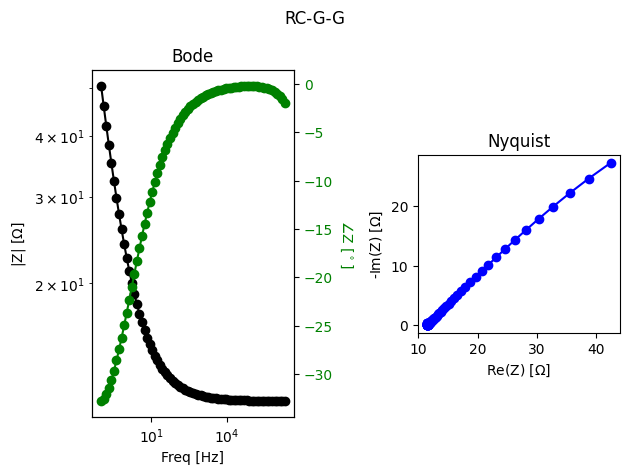

In [9]:
# plot data w/ circuit model
sample = eis_data.loc[eis_data.Circuit == "RC-G-G"].iloc[0]
frequencies = sample.freq
impedances = sample.Z
print(sample.Parameters)
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit)

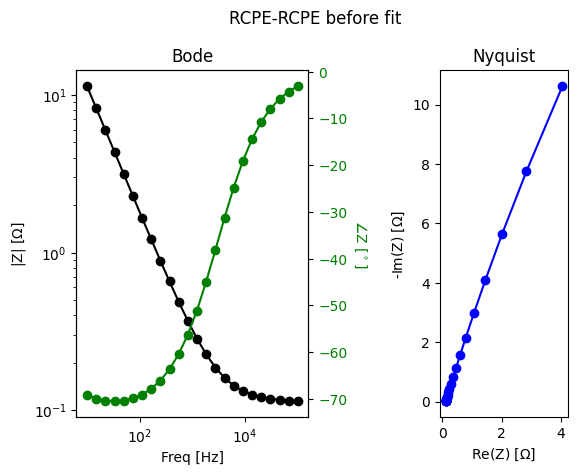

[('R1', 0.112), ('CPE1_C', 5.39e-08), ('CPE1_t', 0.823), ('R2', 174.0), ('CPE2_C', 0.0133), ('CPE2_t', 0.814)]
[('R1', 0, inf), ('CPE1_C', 0, inf), ('CPE1_t', 0, 10), ('R2', 0, inf), ('CPE2_C', 0, inf), ('CPE2_t', 0, 10)]


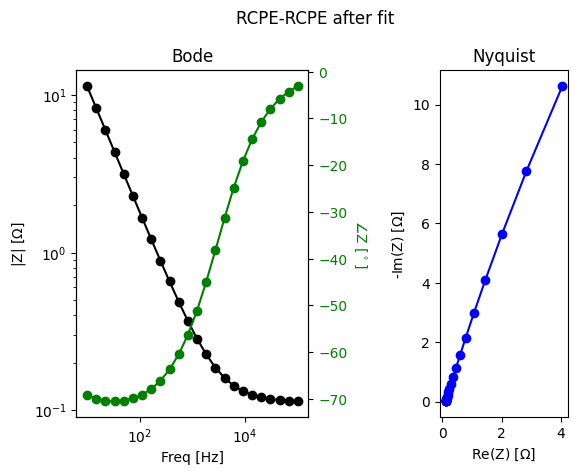

[('R1', 0.11171691543011995), ('CPE1_C', 5.374249118785641e-08), ('CPE1_t', 0.8230727256627173), ('R2', 173.56437417598096), ('CPE2_C', 0.013261315963213427), ('CPE2_t', 0.8143117459595361)]


In [10]:
# Demonstrate Optimizing a circuit model
sample = eis_data.loc[2, :]
frequencies = sample.freq
impedances = sample.Z
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " before fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])
print([x for x in zip(circuit.param_names, circuit.param_fitting_bounds[0], circuit.param_fitting_bounds[1])])
circuit.fit(frequencies, impedances)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])


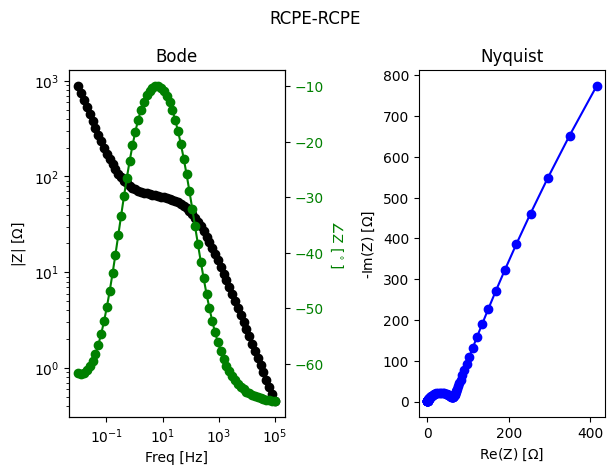

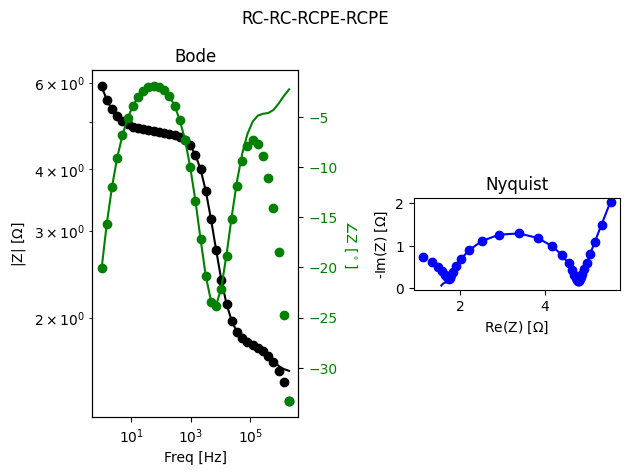

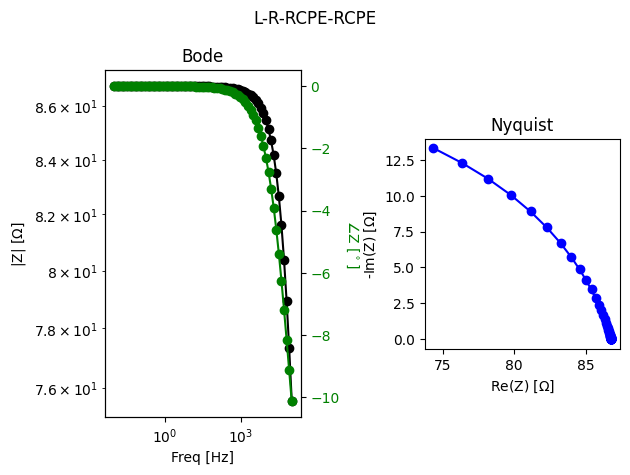

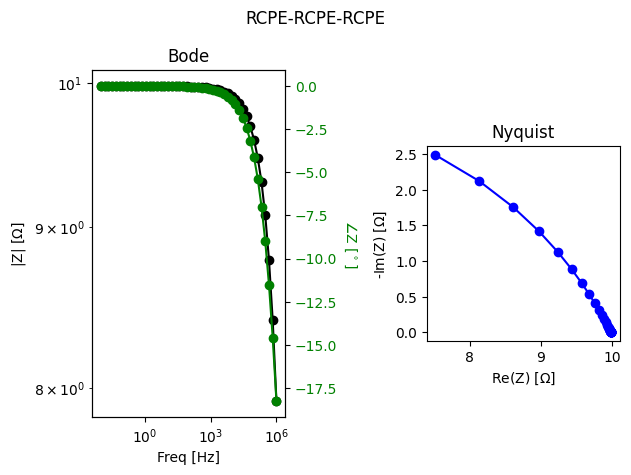

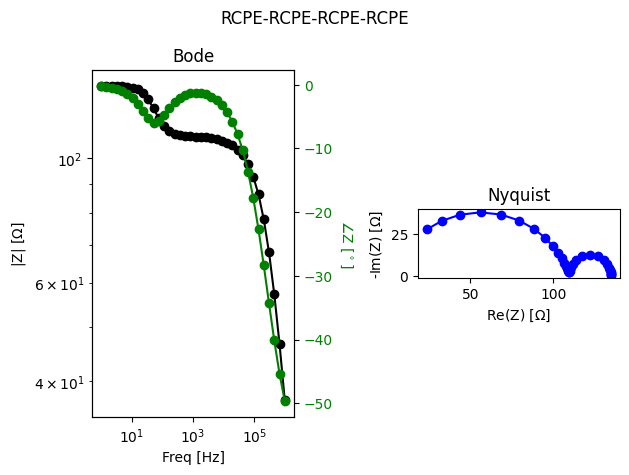

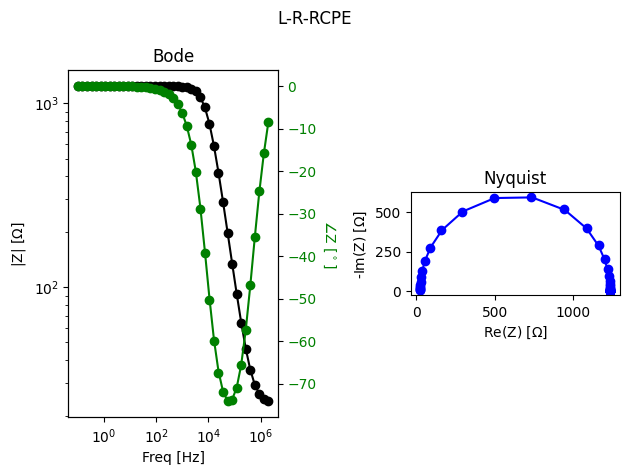

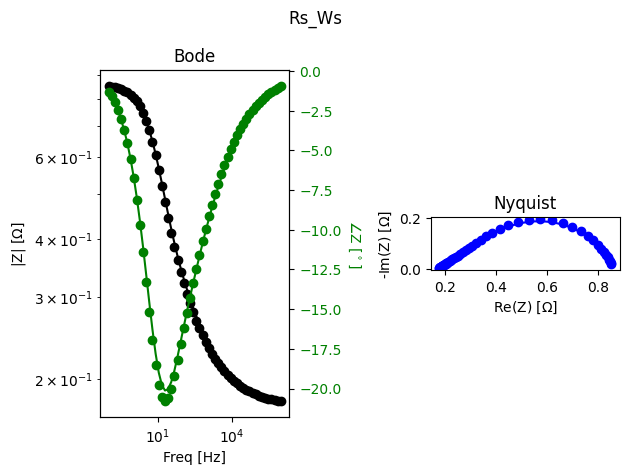

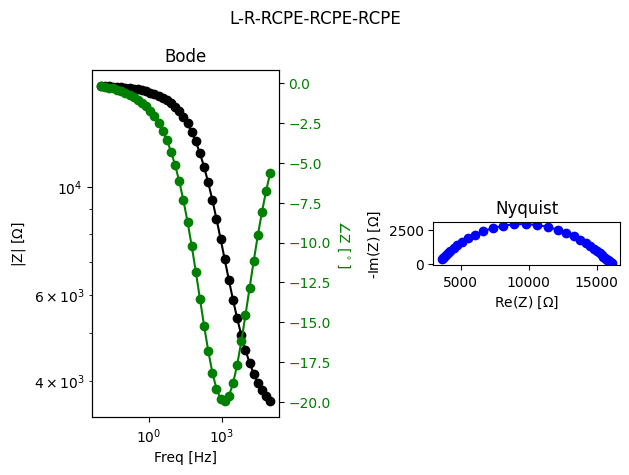

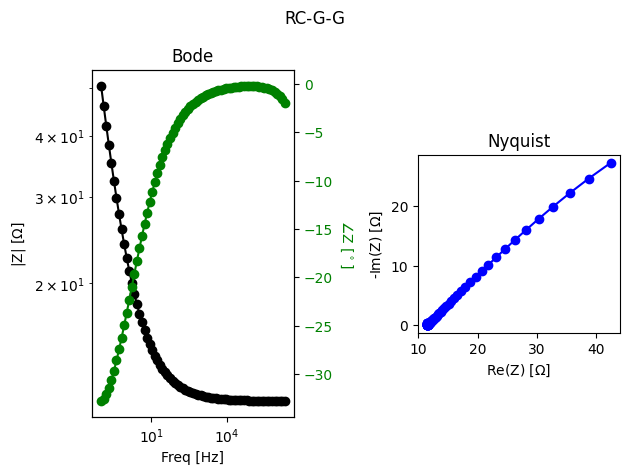

In [11]:
# Plot first example of each circuit type with the circuit model
for circuit_name in eis_data.Circuit.unique():
    try:
        sample = eis_data.loc[eis_data.Circuit == circuit_name].iloc[0]
        frequencies = sample.freq
        impedances = sample.Z
        circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
        plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit)
    except:
        logging.exception(f"unable to simulate circuit: {circuit_name}")